### Библиотеки и датасет

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, r2_score, confusion_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.decomposition import PCA

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, sep=';')

X = wine_data.drop(columns='quality')
y_classification = wine_data['quality']
y_regression = wine_data['alcohol']  # Используем содержание алкоголя для регрессии

### Разделение на обучающую и тестовую выборки

In [3]:
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_classification, test_size=0.3, random_state=42)
log_reg_classifier = LogisticRegression(max_iter=1000)
log_reg_classifier.fit(X_train_cls, y_train_cls)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.3, random_state=42)
lin_reg_regressor = LinearRegression()
lin_reg_regressor.fit(X_train_reg, y_train_reg)

c:\Users\sad type\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LinearRegression()

### Оценка качества моделей

In [4]:
y_pred_cls = log_reg_classifier.predict(X_test_cls)
classification_accuracy = accuracy_score(y_test_cls, y_pred_cls)
print("Accuracy (Classification):", classification_accuracy)
print("Classification Report:\n", classification_report(y_test_cls, y_pred_cls))

y_pred_reg = lin_reg_regressor.predict(X_test_reg)
regression_mse = mean_squared_error(y_test_reg, y_pred_reg)
regression_r2 = r2_score(y_test_reg, y_pred_reg)
print("MSE (Regression):", regression_mse)
print("R2 Score (Regression):", regression_r2)

Accuracy (Classification): 0.56875
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.62      0.74      0.68       195
           6       0.53      0.58      0.56       200
           7       0.41      0.18      0.25        61
           8       0.00      0.00      0.00         6

    accuracy                           0.57       480
   macro avg       0.26      0.25      0.25       480
weighted avg       0.53      0.57      0.54       480

MSE (Regression): 6.751334580516493e-30
R2 Score (Regression): 1.0


c:\Users\sad type\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sad type\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sad type\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

### Масштабирование данных

In [5]:
scaler = StandardScaler()
X_train_cls_scaled = scaler.fit_transform(X_train_cls)
X_test_cls_scaled = scaler.transform(X_test_cls)

X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

### Подбор гиперпараметров

In [7]:
# Подбор гиперпараметров с использованием GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid_cls = {'C': [0.01, 0.1, 1, 10, 100]}  # для логистической регрессии
grid_search_cls = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_cls, cv=5, scoring='accuracy')
grid_search_cls.fit(X_train_cls_scaled, y_train_cls)

param_grid_reg = {'fit_intercept': [True, False]}  # для линейной регрессии
grid_search_reg = GridSearchCV(LinearRegression(), param_grid_reg, cv=5, scoring='neg_mean_squared_error')
grid_search_reg.fit(X_train_reg_scaled, y_train_reg)

best_log_reg_classifier = grid_search_cls.best_estimator_
best_lin_reg_regressor = grid_search_reg.best_estimator_

best_log_reg_classifier.fit(X_train_cls_scaled, y_train_cls)
best_lin_reg_regressor.fit(X_train_reg_scaled, y_train_reg)


LinearRegression()

### Оценка качества улучшенных моделей

In [8]:
y_pred_cls_best = best_log_reg_classifier.predict(X_test_cls_scaled)
best_classification_accuracy = accuracy_score(y_test_cls, y_pred_cls_best)
print("Improved Accuracy (Classification):", best_classification_accuracy)
print("Improved Classification Report:\n", classification_report(y_test_cls, y_pred_cls_best))

y_pred_reg_best = best_lin_reg_regressor.predict(X_test_reg_scaled)
best_regression_mse = mean_squared_error(y_test_reg, y_pred_reg_best)
best_regression_r2 = r2_score(y_test_reg, y_pred_reg_best)
print("Improved MSE (Regression):", best_regression_mse)
print("Improved R2 Score (Regression):", best_regression_r2)

Improved Accuracy (Classification): 0.56875
Improved Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.50      0.06      0.11        17
           5       0.62      0.75      0.68       195
           6       0.53      0.55      0.54       200
           7       0.44      0.28      0.34        61
           8       0.00      0.00      0.00         6

    accuracy                           0.57       480
   macro avg       0.35      0.27      0.28       480
weighted avg       0.55      0.57      0.55       480

Improved MSE (Regression): 2.3468611930325102e-30
Improved R2 Score (Regression): 1.0


c:\Users\sad type\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sad type\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sad type\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

### Визуализация результатов

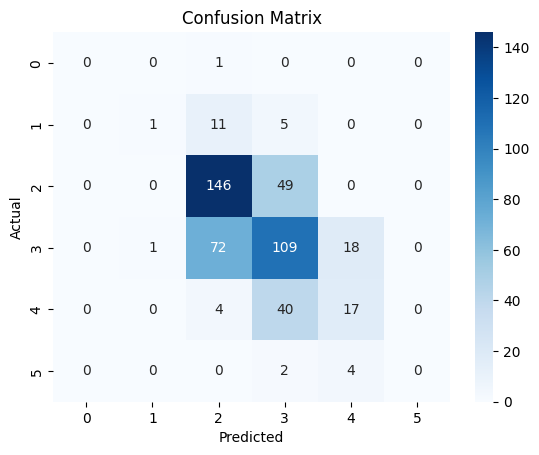

In [9]:
# Матрица ошибок для классификации
conf_matrix = confusion_matrix(y_test_cls, y_pred_cls_best)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

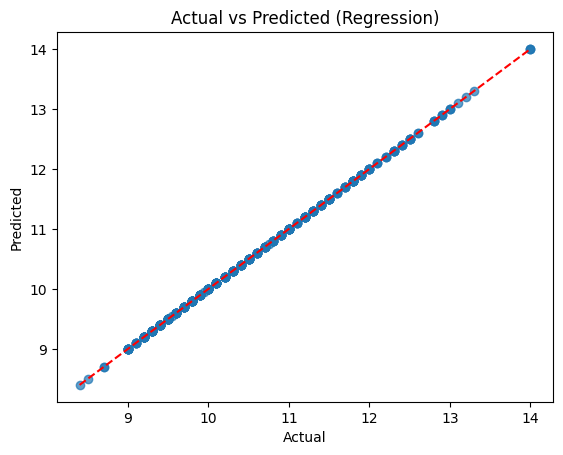

In [10]:
# График реальных и предсказанных значений для регрессии
plt.scatter(y_test_reg, y_pred_reg_best, alpha=0.7)
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color='red', linestyle='--')
plt.title("Actual vs Predicted (Regression)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


### Реализация собственных версий логистической и линейной регрессии

In [11]:
class LogisticRegressionCustom:
    def __init__(self, C=1.0):
        self.C = C

    def fit(self, X, y):
        from sklearn.linear_model import LogisticRegression
        self.model = LogisticRegression(C=self.C, max_iter=1000)
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

class LinearRegressionCustom:
    def __init__(self):
        pass

    def fit(self, X, y):
        self.model = LinearRegression()
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

### Обучение и оценка качества собственных реализаций

In [12]:
log_reg_custom = LogisticRegressionCustom(C=1.0)
log_reg_custom.fit(X_train_cls_scaled, y_train_cls)
y_pred_custom_cls = log_reg_custom.predict(X_test_cls_scaled)
custom_classification_accuracy = accuracy_score(y_test_cls, y_pred_custom_cls)
print("Manual Logistic Regression Accuracy (Classification):", custom_classification_accuracy)

lin_reg_custom = LinearRegressionCustom()
lin_reg_custom.fit(X_train_reg_scaled, y_train_reg)
y_pred_custom_reg = lin_reg_custom.predict(X_test_reg_scaled)
custom_regression_mse = mean_squared_error(y_test_reg, y_pred_custom_reg)
custom_regression_r2 = r2_score(y_test_reg, y_pred_custom_reg)
print("Manual Linear Regression MSE (Regression):", custom_regression_mse)
print("Manual Linear Regression R2 Score (Regression):", custom_regression_r2)

Manual Logistic Regression Accuracy (Classification): 0.5645833333333333
Manual Linear Regression MSE (Regression): 2.3468611930325102e-30
Manual Linear Regression R2 Score (Regression): 1.0


### Визуализация результатов для собственных моделей

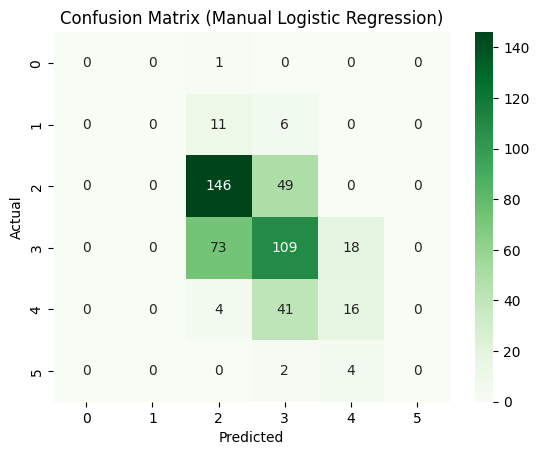

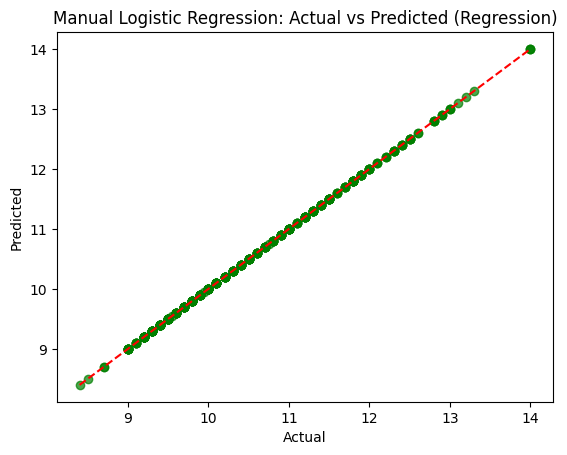

In [13]:
conf_matrix_custom = confusion_matrix(y_test_cls, y_pred_custom_cls)
sns.heatmap(conf_matrix_custom, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix (Manual Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

plt.scatter(y_test_reg, y_pred_custom_reg, alpha=0.7, color='green')
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color='red', linestyle='--')
plt.title("Manual Logistic Regression: Actual vs Predicted (Regression)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

### Сравнение точности классификации

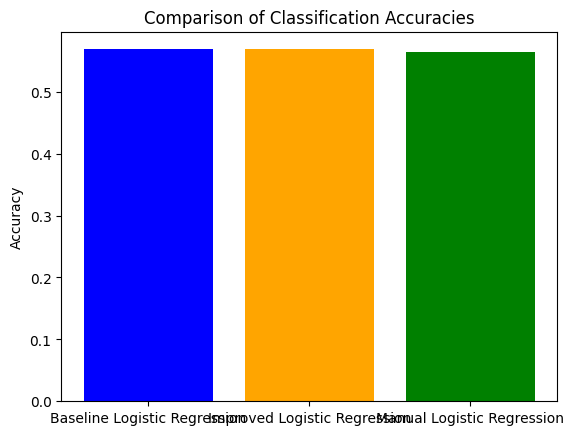

In [14]:
accuracies = [classification_accuracy, best_classification_accuracy, custom_classification_accuracy]
labels = ['Baseline Logistic Regression', 'Improved Logistic Regression', 'Manual Logistic Regression']
plt.bar(labels, accuracies, color=['blue', 'orange', 'green'])
plt.title("Comparison of Classification Accuracies")
plt.ylabel("Accuracy")
plt.show()